# Finding datasets of interest

In [1]:
import datetime
import pandas as pd
import numpy as np
from erddapy import ERDDAP
from tqdm.notebook import tqdm

We can use ERDDAP's built in search function to find datasets that match a keyword

### Find drifter datasets from OSMC

In [2]:
e = ERDDAP(
    server="https://osmc.noaa.gov/erddap",
    protocol="tabledap"
)
url = e.get_search_url(search_for="drifter", response="csv")

df = pd.read_csv(url)
df[["Dataset ID", "Title"]]

,Dataset ID,Title
0,drifter_hourly_qc,Global Drifter Program - 1 Hour Interpolated Q...
1,drifter_6hour_qc,Global Drifter Program - 6 Hour Interpolated Q...


### Find ADCP data on the IOOS sensors ERDDAP

In [3]:
e = ERDDAP(
    server="https://erddap.sensors.ioos.us/erddap",
    protocol="tabledap"
)
url = e.get_search_url(search_for="adcp", response="csv")

df = pd.read_csv(url)
df[["Dataset ID", "Title"]]

,Dataset ID,Title
0,noaa_nos_co_ops_t01010,Sunshine Skyway Bridge ADCP
1,ism-caricoos-pr1_doppler_5e96_75,"CARICOOS PR1 (Ponce, PR) Buoy: ADCP Currents data"
2,ism-caricoos-pr2_doppler_34d7_c6,"CARICOOS PR2 (San Juan, PR) Buoy: ADCP Current..."
3,ism-caricoos-pr3_doppler_b3ca_6d,"CARICOOS PR3 (Vieques, PR) Buoy: ADCP Currents..."
4,ism-caricoos-vi1_doppler_200f_7a,"CARICOOS VI1 (St. John, USVI) Buoy: ADCP Curre..."
5,mooring-ob27m-onslow-bay-nc,"Mooring OB27M, Onslow Bay, NC"
6,ce_312_20160122t2140_delayed,IOOS Glider - ce_312-20160122T2140-delayed
7,ce_383_20170131t1942_delayed,IOOS Glider - ce_383-20170131T1942-delayed
8,ism-secoora-edu_usf_marine_comps,Big Carlos Pass Shorebased Tower (NDBC: BGCF1)
9,edu_usf_marine_comps_1407d550,Big Carlos Pass Shorebased Tower (NDBC: BGCF1)


### Find argo floats with chlorophyll and CDOM data

In [4]:
e = ERDDAP(
    server="https://erddap.ifremer.fr/erddap",
)
url = e.get_search_url(search_for="chlorophyll CDOM", response="csv")

df = pd.read_csv(url)
df[["Dataset ID", "Title"]]

,Dataset ID,Title
0,ArgoFloats-synthetic-BGC,Argo float synthetic vertical profiles : BGC data
1,OceanGlidersGDACTrajectories,OceanGliders GDAC trajectories


### Search with allDatasets

For a more sophisticated search, we can use the `allDatasets` dataset from ERDDAP to examine the primary metadata of all datasets. 

### Get metadata for IOOS glider datasets

In [5]:
e = ERDDAP(
    server="https://gliders.ioos.us/erddap",
    protocol="tabledap",
)

# Fetch dataset list
e.dataset_id = "allDatasets"
df_datasets = e.to_pandas()

# drop the allDatasets row and make the datasetID the index for easier reading
df_datasets.set_index("datasetID", inplace=True)
df_datasets.drop("allDatasets", inplace=True)
df_datasets["minTime"] = pd.to_datetime(df_datasets['minTime (UTC)'].str[:-1])
df_datasets["maxTime"] = pd.to_datetime(df_datasets['maxTime (UTC)'].str[:-1])

# Keep a susbset of useful columns
df_datasets = df_datasets[[
 'institution',
 'minLongitude (degrees_east)',
 'maxLongitude (degrees_east)',
 'minLatitude (degrees_north)',
 'maxLatitude (degrees_north)',
 'minAltitude (m)',
 'maxAltitude (m)',
 'minTime',
 'maxTime',
]]

print(f"Found {len(df_datasets)} datasets")

Found 1682 datasets


In [6]:
df_datasets

,institution,minLongitude (degrees_east),maxLongitude (degrees_east),minLatitude (degrees_north),maxLatitude (degrees_north),minAltitude (m),maxAltitude (m),minTime,maxTime
datasetID,,,,,,,,,
amelia-20180501T0000,Virginia Institute of Marine Science - William...,-75.079579,-74.445788,37.404436,37.539598,-1.040000e+00,-351.1800,2018-05-01 14:58:48,2018-05-14 12:29:12
amelia-20200825T1929,Virginia Institute of Marine Science - William...,-75.360315,-74.443807,36.334915,37.353705,2.511368e-02,-323.9919,2020-08-25 19:59:18,2020-09-25 14:32:48
amelia-20201015T1436,Virginia Institute of Marine Science - William...,-74.947858,-74.405013,37.042386,37.662572,-2.014898e-02,-344.7628,2020-10-15 14:44:15,2020-10-22 06:36:43
amlr01-20181216T0641-delayed,NOAA SWFSC Antarctic Ecosystem Research Division,-61.756371,-56.996472,-63.465319,-62.203002,-1.315100e-14,-1003.8600,2018-12-16 16:05:20,2019-03-08 09:37:33
amlr01-20191206T0452-delayed,NOAA SWFSC Antarctic Ecosystem Research Division,-61.667188,-57.433161,-63.555934,-62.186826,-3.265242e-15,-962.1450,2019-12-06 14:45:17,2020-03-12 14:37:18
...,...,...,...,...,...,...,...,...,...
UW646-20210816T0000,Oregon State University,-125.395030,-124.601065,43.850373,44.653477,4.059241e-01,-996.5469,2021-08-16 18:57:36,2021-08-24 23:59:59
UW646-20211112T0000,Oregon State University,-128.973918,-124.363708,40.820313,41.177692,5.003096e-01,-1005.2760,2021-11-12 18:53:18,2022-06-16 14:33:31
UW646-20220907T0000,Oregon State University,-129.101990,-124.354081,40.805190,41.240848,6.568508e-01,-994.1479,2022-07-29 04:21:11,2023-01-26 13:31:17


### Which gliders have uploaded data in the last 6 hours?

In [7]:
df_datasets[ np.datetime64('now') - df_datasets.maxTime < datetime.timedelta(hours=6)]

,institution,minLongitude (degrees_east),maxLongitude (degrees_east),minLatitude (degrees_north),maxLatitude (degrees_north),minAltitude (m),maxAltitude (m),minTime,maxTime
datasetID,,,,,,,,,
ce_311-20230616T1819,OOI Coastal Endurance,-125.997510,-124.094224,44.368149,44.737978,-0.029757,-197.05240,2023-06-16 18:35:00,2023-09-14 04:50:18
ng278-20230824T0000,Naval Oceanographic Office,-64.834369,-63.946192,17.844341,18.176379,-0.059496,-958.22280,2023-08-25 13:32:05,2023-09-14 04:24:37
ng291-20230726T164200,Naval Oceanographic Office,-78.668013,-74.572498,29.910854,31.691723,0.079560,-952.19430,2023-07-26 17:07:15,2023-09-14 05:43:32
ng309-20230820T0000,Naval Oceanographic Office,-96.107507,-94.032590,25.419211,27.640507,-0.009915,-932.11950,2023-08-20 23:08:14,2023-09-14 05:43:21
ng781-20230816T0000,Naval Oceanographic Office,-95.532589,-93.845523,25.781966,27.756356,-0.009912,-957.95280,2023-08-16 22:18:39,2023-09-14 05:28:22
ru39-20230817T1520,Rutgers University,-74.220534,-72.924055,38.852975,40.346194,-0.873282,-84.27055,2023-08-17 15:21:59,2023-09-14 07:39:13
SG630-20230826T2004,National Oceanic and Atmospheric Administratio...,-67.460857,-66.909718,15.278253,17.867412,0.393429,-904.16140,2023-08-26 20:07:48,2023-09-14 08:11:13
SG664-20230719T1323,National Oceanic and Atmospheric Administratio...,-69.618307,-68.465051,15.701596,18.338595,0.586106,-904.99460,2023-07-19 13:29:34,2023-09-14 07:26:11
SG665-20230907T2003,National Oceanic and Atmospheric Administratio...,-67.472650,-66.786891,18.501444,18.982994,0.185032,-903.42260,2023-09-07 20:06:57,2023-09-14 07:57:36


### Find datasets from deployments that lasted longer than 90 days

In [8]:
df_datasets["endurance"] = df_datasets['maxTime'] - df_datasets['minTime']
min_days = 90
df_datasets[df_datasets["endurance"] > datetime.timedelta(days=min_days)].endurance

datasetID
amlr01-20191206T0452-delayed       96 days 23:52:01
amlr02-20191206T1236-delayed       96 days 15:33:31
amlr03-20191206T0529-delayed       96 days 22:19:47
bios_anna-20180112T0455            91 days 21:55:52
bios_anna-20180112T0455-delayed    93 days 16:11:03
                                         ...       
UW157-20190916T0000               184 days 22:31:43
UW157-20200917T0000               143 days 01:43:53
UW646-20211112T0000               215 days 19:40:13
UW646-20220907T0000               181 days 09:10:06
UW685-20230125T0000               199 days 22:15:40
Name: endurance, Length: 413, dtype: timedelta64[ns]

### Which glider missions extended to a depth of greater than 150 m in seas north of 70 N?

In [9]:
min_altitude = -150 # note the sign!
min_northing = 70
mask = (df_datasets['maxAltitude (m)'] < min_altitude).values \
* (df_datasets['maxLatitude (degrees_north)'] > min_northing).values
df_datasets[mask]

,institution,minLongitude (degrees_east),maxLongitude (degrees_east),minLatitude (degrees_north),maxLatitude (degrees_north),minAltitude (m),maxAltitude (m),minTime,maxTime,endurance
datasetID,,,,,,,,,,
cp_389-20161011T2040-delayed,OOI Coastal & Global Scale Nodes (CGSN),-71.175203,-47.003674,39.331109,84.001959,0.119085,-987.8069,2016-10-11 20:54:26,2017-01-08 18:09:42,88 days 21:15:16
unit_595-20180804T0000-delayed,"University of Alaska Fairbanks, College of Fis...",-168.901621,-155.397927,67.835807,71.753266,-0.072915,-188.1303,2018-08-03 22:28:49,2018-09-24 20:56:07,51 days 22:27:18


In [13]:
e = ERDDAP(
    server="https://gliders.ioos.us/erddap",
    protocol="tabledap",
)
e.constraints = {"time>=": "2018-09-20"}

e.dataset_id = "unit_595-20180804T0000-delayed"
ds = e.to_xarray()

/home/callum/mambaforge/envs/goosdemo/lib/python3.11/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/home/callum/mambaforge/envs/goosdemo/lib/python3.11/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


/home/callum/mambaforge/envs/goosdemo/lib/python3.11/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


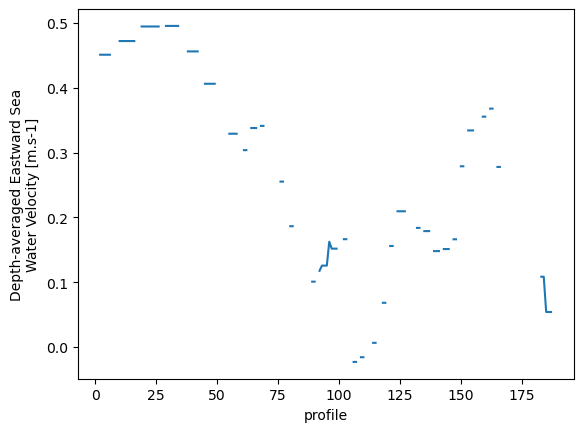

In [14]:
ds.u.plot()

---------------------------
### References

IOOS ERDDAP https://gliders.ioos.us/erddap

More info on using ERDDAP's inbuilt search https://ioos.github.io/erddapy/01b-tabledap-output.html